# 🎯 Aula 2 -Estatística descritiva básica no Pandas 🎯

![histograma](./img/histogram_output.png)

Os dados acima representam a distribuição do ano de nascimento de algumas pessoas. Este gráfico, conhecido como histograma, conta quantas pessoas são daquele ano (por exemplo, temos 20 pessoas que são do ano de 1960).

**Obs**: repare um dado muito interessante: as idades estão ordenadas.

Como você resumiria os dados acima de forma simplificada?

# Estatística Descritiva Básica

A Estatística Descritiva é uma ferramenta imprenscindível na Análise Exploratória de Dados, que ajuda a compreender, resumir e interpretar as características fundamentais de um conjunto de dados. É a parte da estatística preocupada em descrever os dados analisados. Por meio dela, podemos ter uma visão global de uma série de informações, como a variação dos dados envolvidos na análise. 

Aqui, vamos explorar conceitos básicos da estatística descritiva e como aplicá-los utilizando o `Pandas`.


## Medidas de centralidade 

As medidas de centralidade, também chamadas medidas de tendência central, são representações do todo de um conjunto de dados. Elas indicam um ponto que centraliza todos os outros dados. As principais medidas de centralidade são: 
* média
* mediana
* moda. 

A seguir, veremos sobre cada uma delas:


### Média

A média - aqui, média aritmética - é a medida de centralidade mais utilizada em nosso cotidiano, e indica o valor central de um conjunto de números. Ela é determinada pela soma de todos os valores numéricos do conjunto de dados dividida pela quantidade de valores.

$\bar{x} = \frac{\sum_n{(x)}}{n}$

sendo:<br>
$\bar{x}$: média de um conjunto `x`<br>
$n$: quantidade de valores no conjunto `x` 
$\sum_n{(x)}$: soma de todo o conjunto `x`<br>

Essa medida é útil para representar um conjunto de dados com um único valor, facilitando comparações e análises gerais. 

No entanto, é sensível a *outliers* - dados que se diferenciam drasticamente da tendência do conjunto -, que podem distorcer sua representatividade.

No Pandas, utilizamos o método `.mean()`.

Consideremos o exemplo da seção anterior, do DataFrame de avaliações de restaurantes em Nova York. 

In [37]:
import pandas as pd

df_rating = pd.read_csv('./data/Cuisine_rating.csv')

Se quisermos a média das avaliações gerais realizadas, podemos fazer da seguinte forma:

In [38]:
df_rating['Overall Rating'].mean()

3.225

**Obs:** Isto é uma operação `reduce`! (Aplicamos uma função a totalidade dos dados e retorna somente um único número)

Porém, olha o que acontece se realizamos uma operação no DataFrame inteiro (sim é possível!):

In [39]:
df_rating.mean()

C:\Users\AllanSuzuki\AppData\Local\Temp\ipykernel_8708\251571468.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_rating.mean()


User ID            100.500
Area code          141.060
YOB               1984.830
Budget               3.815
Food Rating          3.220
Service Rating       3.230
Overall Rating       3.225
dtype: float64

Podemos notar que o cálculo de média foi realizada em todas as colunas numéricas do nosso DataFrame. Portanto, se não é isto que deseja realizar, devemos sempre lembrar qual é o campo ou a coluna que queremos calcular a média.

### Mediana

A mediana é o valor que separa a metade superior da metade inferior de um conjunto de dados ordenados. Em outras palavras, se todos os valores de um conjunto fossem ordenados, a mediana seria o **valor médio**, ou seja, o valor que está na metade do conjunto.

A mediana é particularmente útil em conjuntos de dados com *outliers* ou distribuições assimétricas, pois fornece uma medida mais robusta da tendência central.


No Pandas, calculamos a mediana utilizando `.median()`.

Se quisermos calcular a mediana das avaliações gerais de restaurantes, podemos escrever o seguinte código:


In [40]:
df_rating['Overall Rating'].median()

3.0

Repare como os valores da `média` e `mediana` são diferentes entre si. Isso é possível porque ambos representam um número de centralidade, mas determinados com estratégias diferentes :)

### Moda

A moda é o valor (ou valores) mais frequentes em um conjunto de dados. Um conjunto de dados pode ser unimodal (possui apenas uma moda), bimodal(duas) ou multimodal(mais de duas).

A moda é especialmente útil em dados categóricos para identificar a **categoria** mais comum.

No Pandas, calculamos a moda utilizando `.mode()`.

Se quisermos calcular a moda das avaliações gerais de restaurantes, podemos escrever o seguinte código:

In [41]:
df_rating['Overall Rating'].mode()

0    3.5
Name: Overall Rating, dtype: float64

O que isto significa? Significa que a nota mais atribuída pelos clientes em `Overall Rating` foi 3.5. Podemos até contar quantas vezes 3.5 foi dada utilizando o `value_counts()`

In [42]:
df_rating['Overall Rating'].value_counts()

3.5    35
3.0    34
2.5    32
5.0    29
4.0    26
2.0    21
1.5    11
4.5     6
1.0     6
Name: Overall Rating, dtype: int64

E assim podemos ter certeza que 3.5 é a moda dos dados.

## Desvio-padrão e variância

O desvio-padrão e a variância encontram-se dentro de um conjunto de medidas chamadas de Medidas de Dispersão.
Essas métricas servem de auxílio para as medidas de centralidade, descrevendo o conjunto de dados e nos auxiliando a ver a dispersão de dados observados, ou seja, quão distantes estão uns dos outros. 

Se os dados variam de forma significativa, por exemplo, a média deixa de ser representativa no conjunto. Assim, quando fazemos uma análise de dados, precisamos ao menos de uma **medida de centralidade e de uma medida de dispersão**.

O desvio-padrão mede a quantidade de variação ou dispersão em um conjunto de valores. O desvio-padrão é crucial para entender o quão espalhados estão os valores em relação à média. E calculamos dessa forma:

$\sigma = \sqrt{\frac{\sum_n{(x_i - \bar{x})^2}}{n}}$

sendo:<br>
$\sigma$: desvio-padrão do conjunto<br>
$x_i$: o valor da posição $i$ do conjunto<br>
$\bar{x}$: média do conjunto<br>
$n$: quantidade de valores do conjunto

A variância, por sua vez, é o quadrado do desvio-padrão. Ela mede o grau de dispersão dos dados em relação à média. Essa medida é útil para comparar a dispersão entre diferentes conjuntos de dados. No entanto, como está em uma unidade quadrada, muitas vezes o desvio padrão é preferido para interpretação. E manteremos as análises somente com o desvio-padrão.

No Pandas, podemos calcular desvio-padrão e variância, respectivamente, pelos métodos `.std()` e `.var()`.

No exemplo de avaliações de restaurante, se quisermos calcular o desvio-padrão:


In [43]:
df_rating['Overall Rating'].std()

1.0794447670099319

O resultado acima significa que o conjuntos de dados em geral estão dispersos 1.079 da média de 3.225, tanto pra cima quanto pra baixo. Isso significa que boa parte dos dados (estatísticamente 68% dos dados) estão localizados entre 3.225 $\pm$ 1.079, ou seja, entre 2.146 e 4.302.

Vamos ilustrar o exemplo um pouco melhor para percebermos visualmente.<br>
No exemplo abaixo, temos duas amostras. Ambas possuem média semelhantes, porém uma amostra tem desvio padrão maior que a outra amostra.<br>
No exemplo abaixo essa comparação é realizada visualmente.

Text(0.5, 1.0, 'High variance')

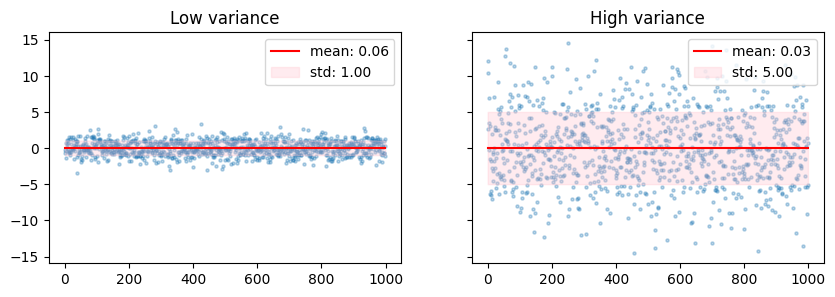

In [44]:
import numpy as np
import matplotlib.pyplot as plt
# plot graph with high deviation
def create_sample(n=1000, std=1):
    return np.random.randn(n)*std

low_variation_sample = create_sample()
high_variation_sample = create_sample(std=5)

fig,ax = plt.subplots(1,2,sharey=True, figsize=(10,3))
predef = {'alpha':0.3, 's':5}
ax[0].scatter(range(len(low_variation_sample)),low_variation_sample, **predef)
ax[0].plot(range(len(low_variation_sample)),[low_variation_sample.mean()]*len(low_variation_sample), c='r', label=f'mean: {low_variation_sample.mean():.2f}')
ax[0].fill_between(range(len(low_variation_sample)),
                   [low_variation_sample.mean()-low_variation_sample.std()]*len(low_variation_sample),
                   [low_variation_sample.mean()+low_variation_sample.std()]*len(low_variation_sample),
                     color='pink', alpha=.3,label=f'std: {low_variation_sample.std():.2f}')
ax[0].legend(loc=1)
ax[0].set_title('Low variance')

ax[1].scatter(range(len(high_variation_sample)),high_variation_sample, **predef)
ax[1].plot(range(len(high_variation_sample)),[high_variation_sample.mean()]*len(high_variation_sample), c='r', label=f'mean: {high_variation_sample.mean():.2f}')
ax[1].fill_between(range(len(high_variation_sample)),
                   [high_variation_sample.mean()-high_variation_sample.std()]*len(high_variation_sample),
                   [high_variation_sample.mean()+high_variation_sample.std()]*len(high_variation_sample),
                     color='pink', alpha=.3,label=f'std: {high_variation_sample.std():.2f}')
ax[1].legend(loc=1)
ax[1].set_title('High variance')

Um desvio-padrão baixo indica que os valores tendem a estar próximos da média, enquanto um desvio-padrão alto indica uma ampla variação nos dados. 

## Quartil
Quartis são valores que dividem um conjunto de dados em quatro partes iguais, cada uma contendo 25% dos dados. Os principais quartis são o primeiro quartil (25%), o segundo quartil (50%, que é a mediana) e o terceiro quartil (75%).

Essas medidas são essenciais para compreender a distribuição dos dados, identificar outliers e entender a dispersão dos dados.

No Pandas, o cálculo do quartil é obtido por `.quantile()`, no qual pede o parâmetro `q` com os quantis que queremos. Neste caso os quantis são 0.25 para o 1o quartil, 0.5 para a mediana e 0.75 para o 3o quartil.

 Vamos ver os quartis nas avaliações gerais do dataset de restaurantes:

In [45]:
df_rating['Overall Rating'].quantile([0.25, 0.5, 0.75])

0.25    2.5
0.50    3.0
0.75    4.0
Name: Overall Rating, dtype: float64


## A função *.describe()* no Pandas
A função `.describe()` do Pandas oferece um resumo estatístico dos dados, incluindo média, mediana, moda, desvio padrão, mínimo, máximo e quartis, ou seja, tudo o que vimos até agora :)

Podemos ver no exemplo que trabalhamos durante esta seção:

In [46]:
df_rating['Overall Rating'].describe()

count    200.000000
mean       3.225000
std        1.079445
min        1.000000
25%        2.500000
50%        3.000000
75%        4.000000
max        5.000000
Name: Overall Rating, dtype: float64

# Execícios


## Referências
[Documentação Pandas](https://pandas.pydata.org/docs/)

[Dataset Usado](https://www.kaggle.com/datasets/surajjha101/cuisine-rating)